In [2]:
!pip install pydot graphviz

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import tree
import graphviz

In [4]:
# Carregar os dados
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS_BmxRSRvCTBxAn1KzCxAPKtlJ8JcNuipkJepr3zv2TD6ibwx__r5kLSiZii_URxpu5gmh1kOHxCtr/pub?gid=1170682623&single=true&output=csv')

# Verificar se há colunas nulas
assert df.isnull().sum().sum() == 0, "Existem colunas nulas no dataset."

# Separar os dados em x (dados de treino) e y (resultados)
x = pd.get_dummies(df.drop(['class'], axis=1))
y = pd.get_dummies(df['class'])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

# Manipulação dos dados de rotulo
train_label = (y_train.iloc[:, 0] > y_train.iloc[:, 1]).astype(int)
test_label = (y_test.iloc[:, 0] > y_test.iloc[:, 1]).astype(int)

In [5]:
# Parâmetros para o modelo
parameters = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 4, 5],
    'max_depth': [9, 10, 11, 12],
    'class_weight': ['balanced', None],
}

In [9]:
# Criar e treinar o modelo
tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, train_label)
model = gsearch.best_estimator_
model

DecisionTreeClassifier(class_weight='balanced', max_depth=9)

In [22]:
# Predição nos dados de teste
score = model.score(X_test, test_label)
print(f"A acurácia do modelo CART é: {score * 100}% nos dados de teste.")

A acurácia do modelo CART é: 100.0% nos dados de teste.


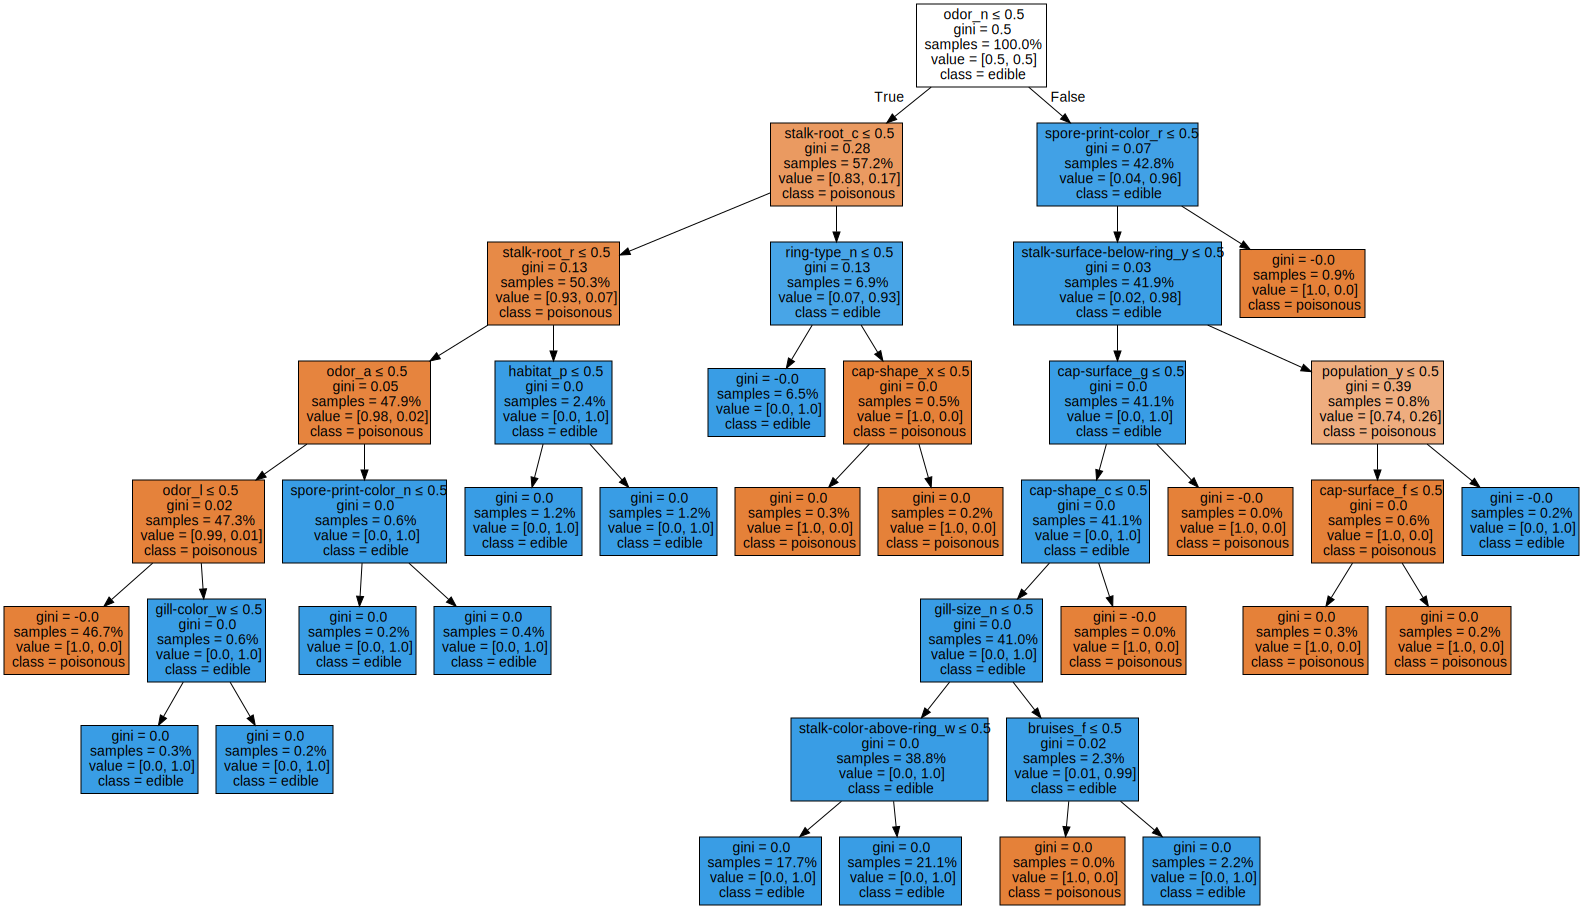

In [33]:
# Exibir o gráfico com formatação personalizada
dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=X_test.columns,
    class_names=['poisonous', 'edible'],
    filled=True,
    rounded=False,
    special_characters=True,
    proportion=True,
    precision=2,
    label='all',
    impurity=True
)
graph.render("decision_tree_graph", format='png')
graph